# Week4 Evaluation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# get data (only run once)
# data = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv"
# !wget $data 

In [3]:
df = pd.read_csv("data.csv")
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [4]:
# only choose certain columns
selected_df = df[
    [
    "Make",
    "Model",
    "Year",
    "Engine HP",
    "Engine Cylinders",
    "Transmission Type",
    "Vehicle Style",
    "highway MPG",
    "city mpg",
    "MSRP"
    ]
].copy()
selected_df

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


In [5]:
# format the df
selected_df.columns = selected_df.columns.str.replace(" ", "_").str.lower()
selected_df_columns = list(selected_df.dtypes.index)

for c in selected_df_columns:
    if selected_df[c].dtype == "object":
        selected_df[c] = selected_df[c].str.lower().str.replace(" ", "_")
        
selected_df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500


In [6]:
selected_df.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [7]:
# fill in 0
selected_df.fillna(0, inplace=True)
selected_df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [8]:
# make a new variable as our binary target variable
selected_df["above_average"] = (selected_df["msrp"] > selected_df["msrp"].mean()).astype(int)
selected_df

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp,above_average
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135,1
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650,1
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350,0
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450,0
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500,0
...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,46120,1
11910,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,56670,1
11911,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,50620,1
11912,acura,zdx,2013,300.0,6.0,automatic,4dr_hatchback,23,16,50920,1


In [9]:
# split the data
from sklearn.model_selection import train_test_split
selected_df_full_train, selected_df_test = train_test_split(selected_df, test_size=0.2, random_state=1)
selected_df_train, selected_df_val = train_test_split(selected_df_full_train, test_size=0.25, random_state=1)

In [10]:
len(selected_df_train), len(selected_df_val), len(selected_df_test)

(7148, 2383, 2383)

In [11]:
# reset index
selected_df_train = selected_df_train.reset_index(drop=True)
selected_df_val = selected_df_val.reset_index(drop=True)
selected_df_test = selected_df_test.reset_index(drop=True)

In [12]:
# get y target value
y_train = selected_df_train["above_average"].values
y_val = selected_df_val["above_average"].values
y_test = selected_df_test["above_average"].values

In [13]:
# drop the target value from dataset
del selected_df_train["msrp"]
del selected_df_val["msrp"]
del selected_df_test["msrp"]
del selected_df_train["above_average"]
del selected_df_val["above_average"]
del selected_df_test["above_average"]

selected_df_train

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
0,toyota,highlander_hybrid,2016,280.0,6.0,automatic,4dr_suv,28,27
1,chevrolet,impala_limited,2014,300.0,6.0,automatic,sedan,30,18
2,buick,regal,2016,259.0,4.0,automatic,sedan,27,19
3,volkswagen,cc,2015,280.0,6.0,automated_manual,sedan,25,17
4,dodge,grand_caravan,2016,283.0,6.0,automatic,passenger_minivan,25,17
...,...,...,...,...,...,...,...,...,...
7143,subaru,impreza,2015,148.0,4.0,manual,4dr_hatchback,33,24
7144,infiniti,qx50,2016,325.0,6.0,automatic,4dr_suv,24,17
7145,honda,fit,2017,130.0,4.0,automatic,4dr_hatchback,37,32
7146,audi,200,1991,162.0,5.0,automatic,sedan,20,16


In [14]:
selected_df_train.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
dtype: object

Q1 Which numerical variable (among the following 4) has the highest AUC?
- engine_hp
- engine_cylinders
- highway_mpg
- city_mpg

In [15]:
from sklearn.metrics import roc_auc_score

for n in ["engine_hp", "engine_cylinders", "highway_mpg", "city_mpg"]:
    auc = roc_auc_score(y_train, selected_df_train[n])
    print(f"auc_{n}: {auc}")

auc_engine_hp: 0.9171031265539011
auc_engine_cylinders: 0.766116490165669
auc_highway_mpg: 0.3669412128227987
auc_city_mpg: 0.3265755356754767


Q2 What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.678
- 0.779
- 0.878
- 0.979

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer

all_columns = list(selected_df_train.dtypes.index)
dicts = selected_df_train[all_columns].to_dict(orient="records")
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dicts)

model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000)
model.fit(X_train, y_train)

dicts_val = selected_df_val[all_columns].to_dict(orient="records")
X_val = dv.transform(dicts_val)
y_pred = model.predict_proba(X_val)[:, 1]

auc_val = roc_auc_score(y_val, y_pred)
auc_val

0.9803867466832218

Q3 At which threshold precision and recall curves intersect?
- 0.28
- 0.48
- 0.68
- 0.88

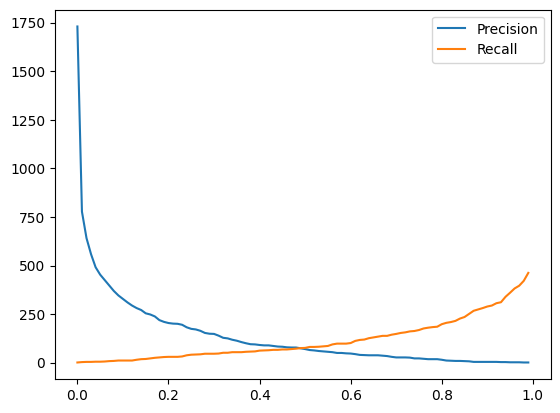

In [25]:
scores = []
thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, tn, fp, fn))

columns = ["threshold", "tp", "tn", "fp", "fn"]
selected_df_val = pd.DataFrame(scores, columns=columns)
selected_df_val["precision"] = selected_df_val.tp / selected_df_val.tp + selected_df_val.fp
selected_df_val["recall"] = selected_df_val.tp / selected_df_val.tp + selected_df_val.fn

# selected_df_train
plt.plot(selected_df_val.threshold, selected_df_val["precision"], label="Precision")
plt.plot(selected_df_val.threshold, selected_df_val["recall"], label="Recall")
plt.legend()


Q4 This is the formula for computing F1:

 F1 = 2 * (P*R / (P+R))

Where 
 P is precision and 
 R is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.12
- 0.32
- 0.52
- 0.72

In [34]:
selected_df_val["f1"] = 2 * selected_df_val.precision * selected_df_val.recall / (selected_df_val.precision + selected_df_val.recall)
columns = ["threshold", "tp", "tn", "fp", "fn", "f1"]
# selected_df_val = pd.DataFrame(scores, columns=columns)

selected_df_val.fillna(0, inplace=True)
selected_df_val

,threshold,tp,tn,fp,fn,precision,recall,f1
0,0.00,654,0,1729,0,1730.0,1.0,1.998845
1,0.01,652,953,776,2,777.0,3.0,5.976923
2,0.02,651,1089,640,3,641.0,4.0,7.950388
3,0.03,651,1172,557,3,558.0,4.0,7.943060
4,0.04,650,1239,490,4,491.0,5.0,9.899194
...,...,...,...,...,...,...,...,...
96,0.96,273,1728,1,381,2.0,382.0,3.979167
97,0.97,259,1728,1,395,2.0,396.0,3.979899
98,0.98,234,1729,0,420,1.0,421.0,1.995261
99,0.99,193,1729,0,461,1.0,462.0,1.995680


In [41]:
new_threholds = [0.12, 0.32, 0.52, 0.72]

for i in new_threholds:
    result = selected_df_val[selected_df_val.threshold == i]["f1"]  
    print(f"threshold {i}: f1 {result}")


threshold 0.12: f1 12    21.206557
Name: f1, dtype: float64
threshold 0.32: f1 32    72.938547
Name: f1, dtype: float64
threshold 0.52: f1 52    70.875
Name: f1, dtype: float64
threshold 0.72: f1 72    46.032787
Name: f1, dtype: float64
